Missing values in the dataset:
sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
species              0
dtype: int64

Summary statistics:
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)  
count        150.000000  
mean           1.199333  
std            0.762238  
min            0.100000  
25%            0.300000  
50%            1.300000  
75%            1.800000  
max            2.500000  


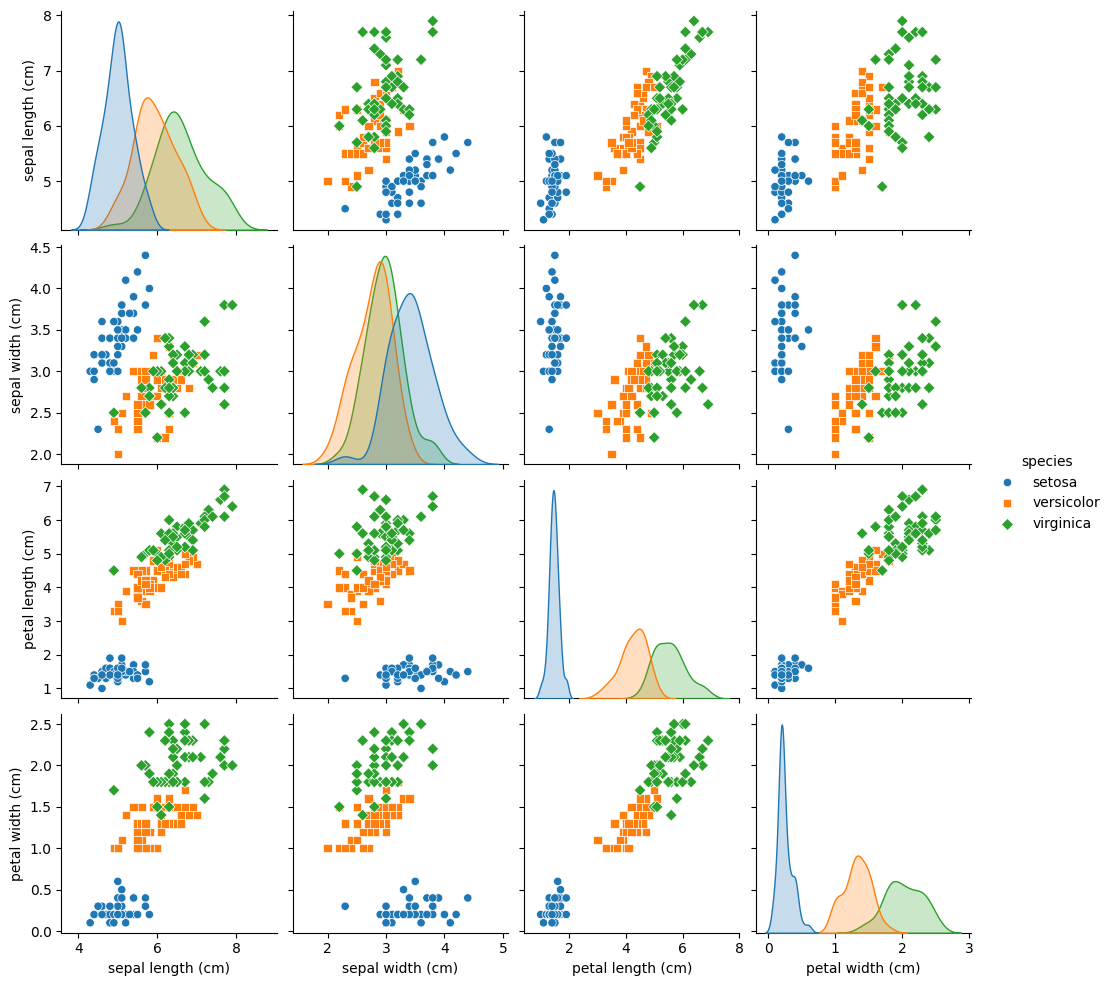

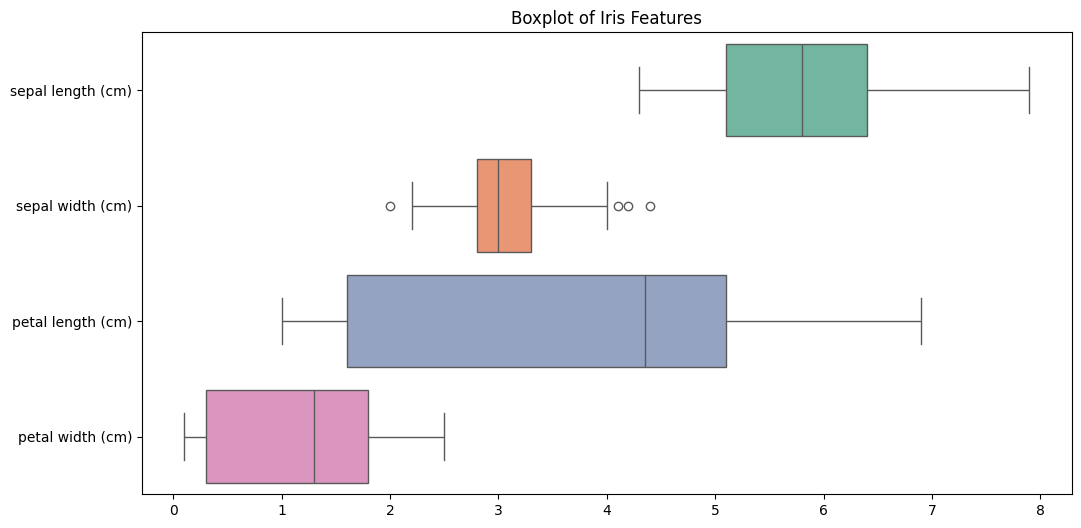

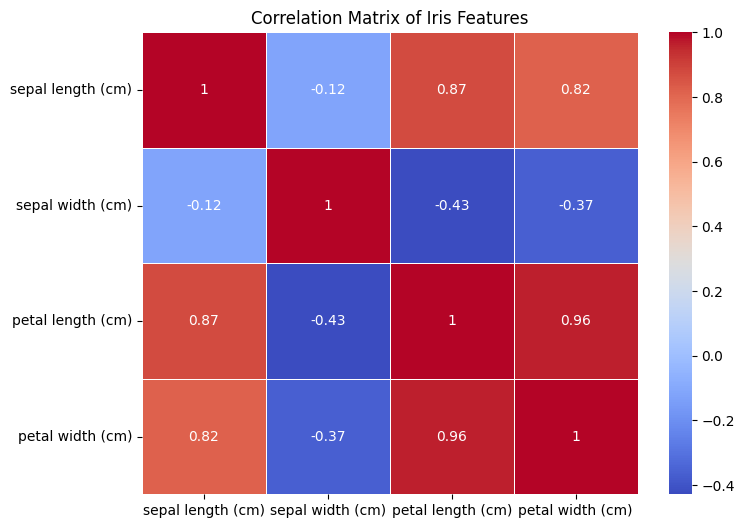


Accuracy of Decision Tree Classifier: 0.9777777777777777

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       0.93      1.00      0.96        13
   virginica       1.00      0.92      0.96        13

    accuracy                           0.98        45
   macro avg       0.98      0.97      0.97        45
weighted avg       0.98      0.98      0.98        45



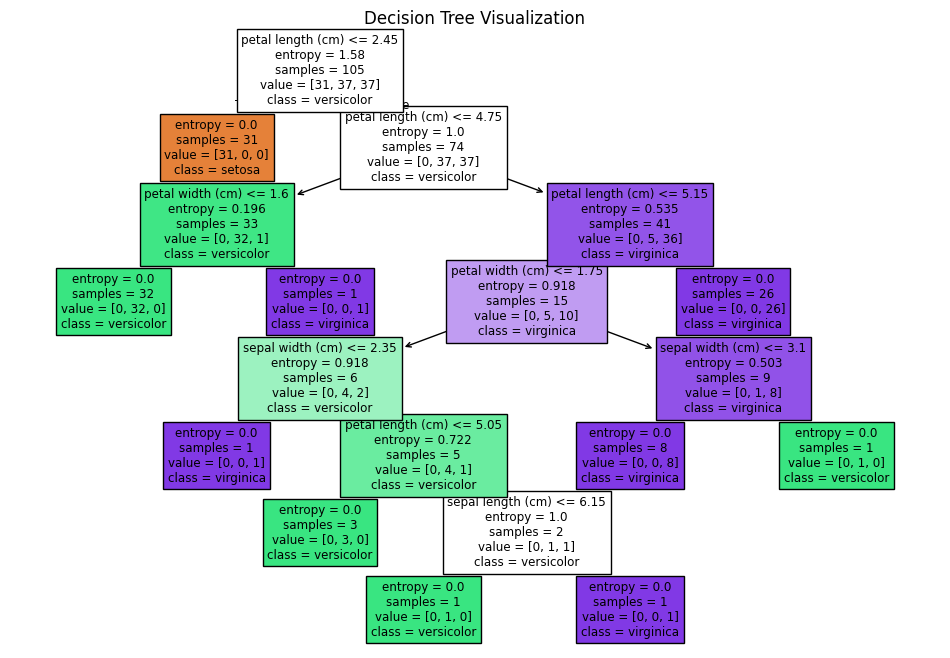

C:\Users\albin\AppData\Local\Temp\ipykernel_2796\3848004391.py:82: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance, palette='viridis')


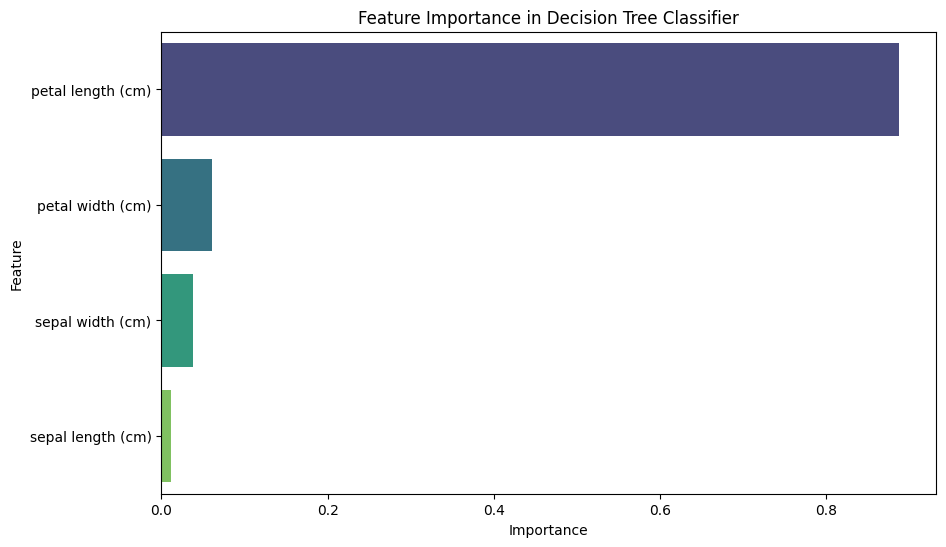

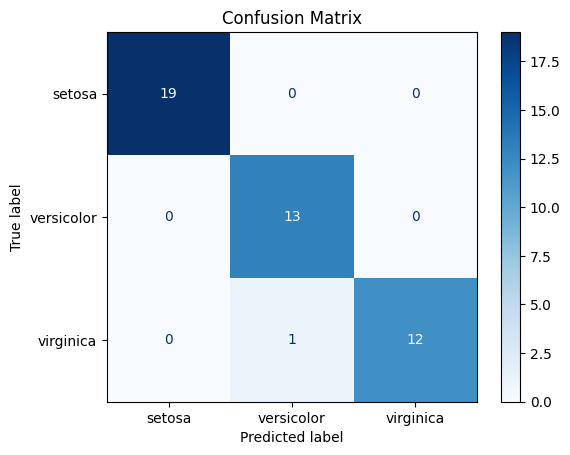

<Figure size 640x480 with 0 Axes>

In [3]:
# Step 1: Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Step 2: Load the Iris dataset
iris = load_iris()
# Convert to pandas DataFrame
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_df['species'] = iris.target  # Add target as 'species'
iris_df['species'] = iris_df['species'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})  # Map target numbers to species names

# Step 3: Check for missing values
print("Missing values in the dataset:")
print(iris_df.isnull().sum())  # No missing values in the Iris dataset

# Step 4: Summary statistics
print("\nSummary statistics:")
print(iris_df.describe())

# Step 5: Exploratory Data Analysis (EDA)
# Pairplot to visualize pairwise relationships
sns.pairplot(iris_df, hue='species', markers=["o", "s", "D"])
plt.show()

# Boxplot to check for outliers in each feature
plt.figure(figsize=(12, 6))
sns.boxplot(data=iris_df.drop(columns=['species']), orient="h", palette="Set2")  # Dropping 'species' for numeric plot
plt.title("Boxplot of Iris Features")
plt.show()

# Correlation matrix (Dropping the non-numeric 'species' column)
plt.figure(figsize=(8, 6))
sns.heatmap(iris_df.drop(columns=['species']).corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Matrix of Iris Features")
plt.show()

# Step 6: Handling Categorical Data (Label Encoding)
# Here, 'species' is already encoded as numbers (0, 1, 2), so no further encoding is necessary.
# If it were categorical text, we would use LabelEncoder to convert them to numeric values:
label_encoder = LabelEncoder()
iris_df['species_encoded'] = label_encoder.fit_transform(iris_df['species'])

# Step 7: Train-Test Split
X = iris_df.drop(columns=['species', 'species_encoded'])  # Features (dropping both text and encoded species columns)
y = iris_df['species_encoded']  # Target variable (encoded species)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 8: Building and Training the Decision Tree Classifier
clf = DecisionTreeClassifier(criterion='entropy', random_state=42)
clf.fit(X_train, y_train)

# Step 9: Making Predictions
y_pred = clf.predict(X_test)

# Step 10: Evaluating the Model
accuracy = accuracy_score(y_test, y_pred)
print("\nAccuracy of Decision Tree Classifier:", accuracy)
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=iris.target_names))

# Step 11: Visualizing the Decision Tree
from sklearn.tree import plot_tree

plt.figure(figsize=(12, 8))
plot_tree(clf, feature_names=iris.feature_names, class_names=iris.target_names, filled=True)
plt.title("Decision Tree Visualization")
plt.show()

# Step 12: Feature Importance
feature_importance = pd.DataFrame({'Feature': iris.feature_names, 'Importance': clf.feature_importances_})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

# Barplot to visualize feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance, palette='viridis')
plt.title("Feature Importance in Decision Tree Classifier")
plt.show()

# Step 13: Additional Model Evaluation (Optional)
# Confusion matrix to evaluate model performance
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

conf_matrix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=iris.target_names)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()


plt.savefig('fig.png')